<a href="https://colab.research.google.com/github/ruby651/bankmarketing/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis with Python**

## **The target customer for marketing campaign for term deposit product**

### **Introduction**

In this project, I will analyse the customer dataset of Portuguese banking institution for their markerting campaign to sell terms deposit via telephonic communication. The bank identified that telephonic methods is the most effective approach to reach their customer; however, this type of maketing campaign require a huge investment in their call center to approach all their all customer. Therefore, this project aims to mitigate the inefficiencies in the campaign. There are two primary objectives for this intiative:
* Identify the bank's customer base to determine whether the term deposit product is suitable for them.
* Identify the target customers for the term deposit marketing campaign via phone calls.
---
Data set source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data?select=test.csv.


Importing some libraries for exploring data and visualisation

In [1]:
import numpy as np                  #For linear algebra
import pandas as pd                 #For working with dataset
import matplotlib
import matplotlib.pyplot as plt     #Visualisation
import seaborn as sns               #Visualisation

### **Data Exploration**

Exploring and understanding dataset information

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final project/train.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


This dataset has 45211 customers and 17 attributes with two data types: numeric and categorical. These attributes demonstrate different aspects of customer personal information, details of current and past campaigns related to each customer as well as their subscription status to the term deposit product. Additionally, there are no missing values in dataset since the number of non-null values does match the number of entries. The metadata of the dataset are provided below by the bank.

Metadata:
* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","unknown","unemployed", "management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* 4 - education (categorical: "unknown","secondary","primary","tertiary")
* 5 - default: has credit in default? (binary: "yes","no")
* 6 - balance: average yearly balance, in euros (numeric)
* 7 - housing: has housing loan? (binary: "yes","no")
* 8 - loan: has personal loan? (binary: "yes","no")

---
Related with the last contact of the current campaign:
* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
* 10 - day: last contact day of the month (numeric)
* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* 12 - duration: last contact duration, in seconds (numeric)
---
Other attributes:
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
---
Output variable (desired target):
* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")


To improve the readable of the dataset, the 'y' variable is changed name to subscribed.deposit

In [ ]:
df.rename({'y':'subscribed.deposit'}, axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed.deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Check duplicated instances in the dataset

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [ ]:
df.duplicated().sum()

0

**There is no duplicated in the dataset**

### **Data Analysis**

Creating two variable called categorical and numerical respectively to make it easier for understanding the columns given their different characteristics.

In [ ]:
# List of categorical variables
categorical = [i for i in df.columns if df[i].dtypes == 'O']
# List of numerical variables
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed.deposit'] 
 numerical:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Descriptive statistics about numerical variables

In [ ]:
df[numerical].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The statistical table shows that numerical variables have different ranges.

Descriptive statistics about categorical variables

In [ ]:
df[categorical].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed.deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


The categorical variables table summarizes the most common values for each variable along with its frequencies in the dataset.

***Customer demoragraphic***  

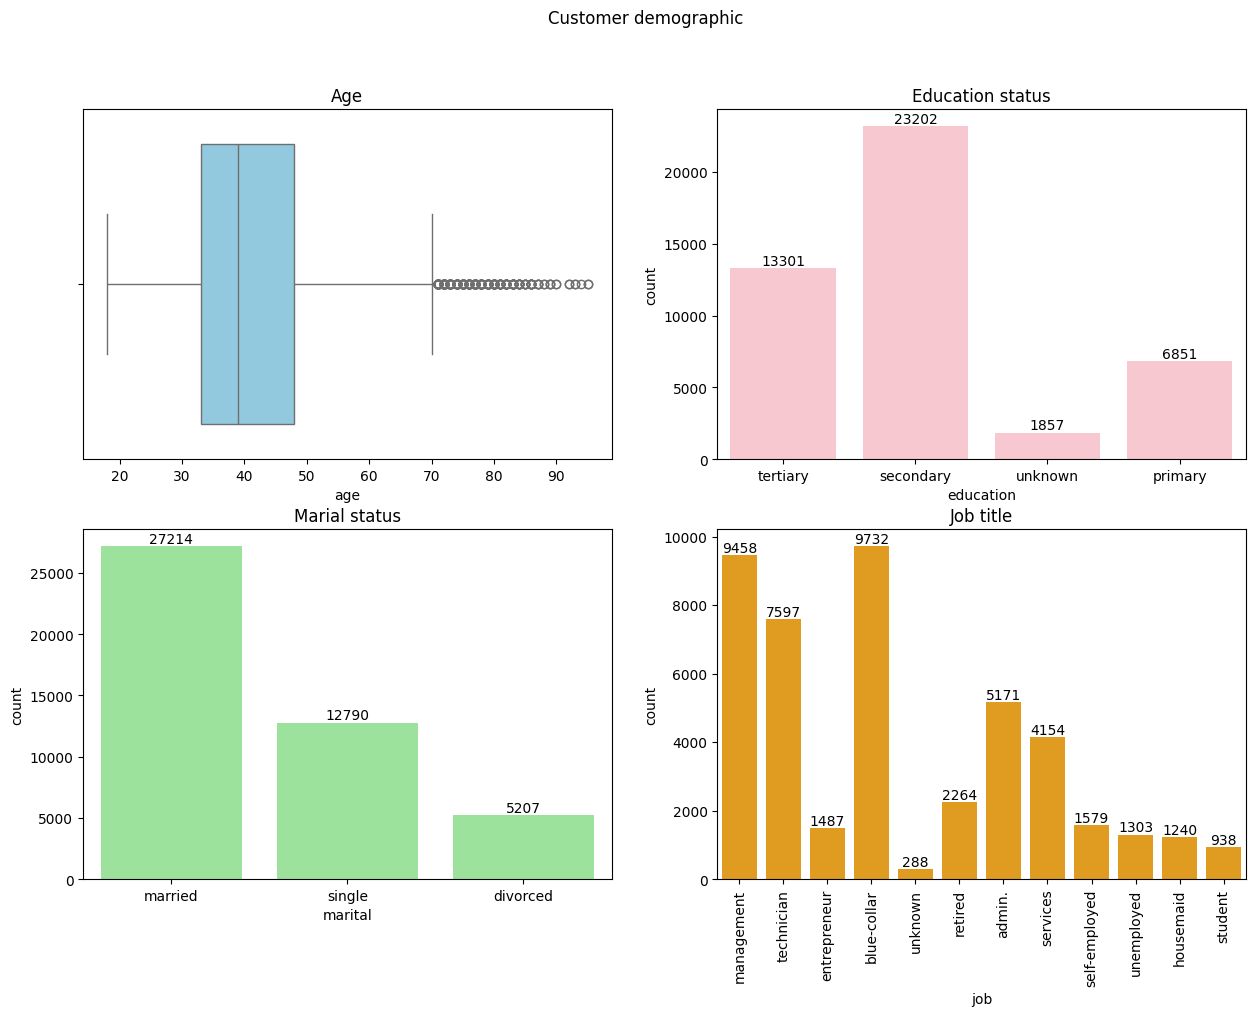

In [ ]:
plt.figure(figsize=(15, 10))
#Age graph
plt.subplot(2,2,1)
age = sns.boxplot(x = 'age',data = df, color = 'skyblue')
plt.title("Age")
#Education graph
plt.subplot(2,2,2)
edu = sns.countplot(x = 'education',data = df, color ='pink')
for p in edu.patches:
    edu.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title("Education status")
# Marital graph
plt.subplot(2,2,3)
marital = sns.countplot(x = 'marital',data = df, color ='lightgreen')
for p in marital.patches:
    marital.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title("Marial status")
# Job graph
plt.subplot(2,2,4)
job = sns.countplot(x = 'job',data = df, color ='orange')
for p in job.patches:
    job.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title("Job title")
plt.xticks(rotation=90)
plt.suptitle("Customer demographic")
plt.show()

The above graphs show that over half of the bank's customers are aged between 30 and 50. A large proporbility of them is already married. Moreover, more than 80% of our customers have completed at least secondary school. Additionally, the majority of our customers are blue-collar workers, manager and technician.

***Customer financial behaviour***  

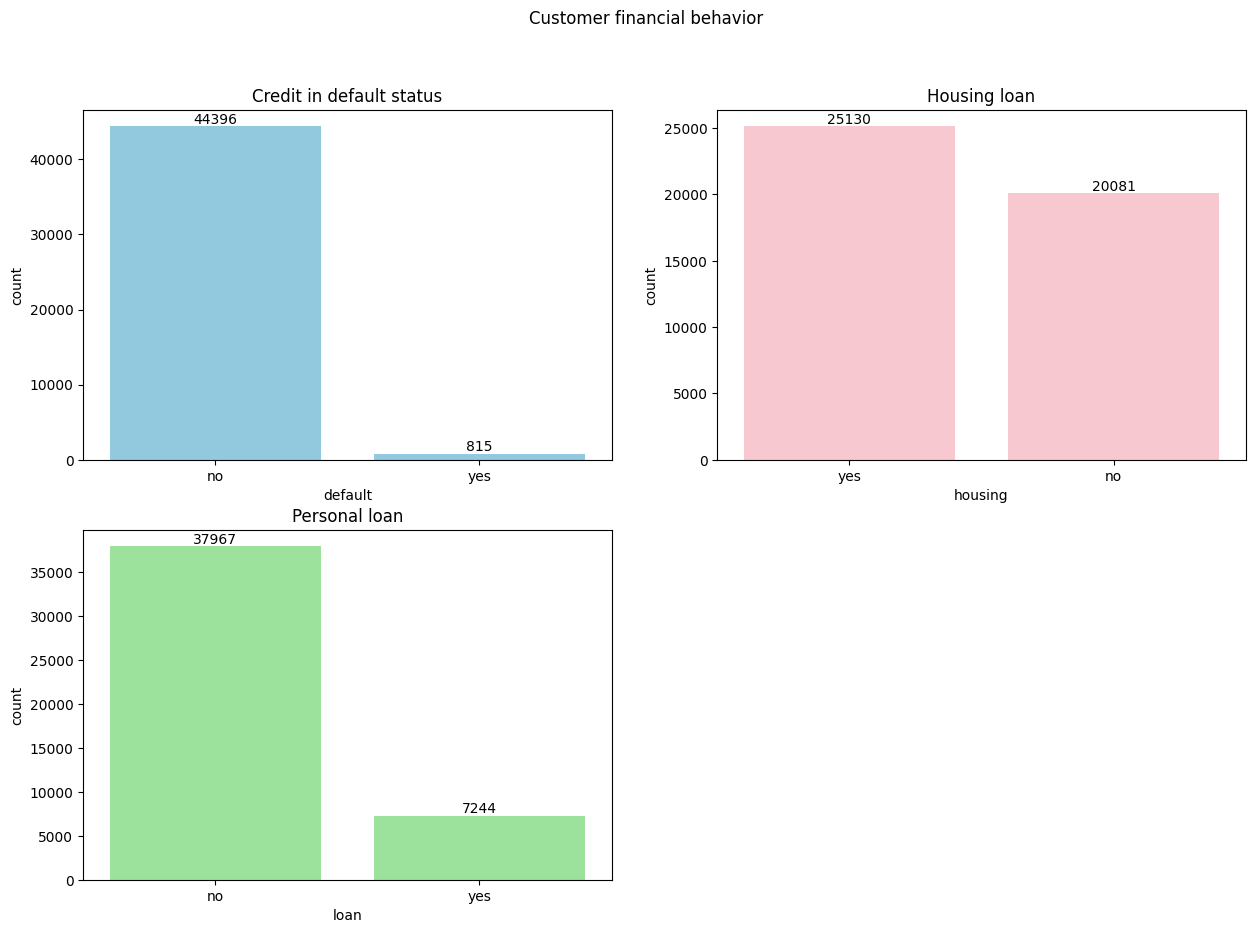

In [ ]:
plt.figure(figsize=(15, 10))
# credit in default graph
plt.subplot(2,2,1)
dfaut = sns.countplot(x = 'default',data = df, color ='skyblue')
for p in dfaut.patches:
    dfaut.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title("Credit in default status")
# Housing loan graph
plt.subplot(2,2,2)
hsing = sns.countplot(x = 'housing',data = df, color ='pink')
for p in hsing.patches:
    hsing.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title("Housing loan")
# Personal loan graph
plt.subplot(2,2,3)
ploan = sns.countplot(x = 'loan',data = df, color ='lightgreen')
for p in ploan.patches:
    ploan.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')
plt.title("Personal loan")
plt.suptitle("Customer financial behavior")
plt.show()

In terms of financial behavior, our customers typically exhibit good credit ratings and often have housing loans. However, they usually do not have personal loans.




To evaluate the suitability of term deposit product for our customer, the  balance amount of their account will be one of the key  factors. This analysis will involve assessing the average account balance based on their job titles and comparing these number to the overall average balance across all customers.

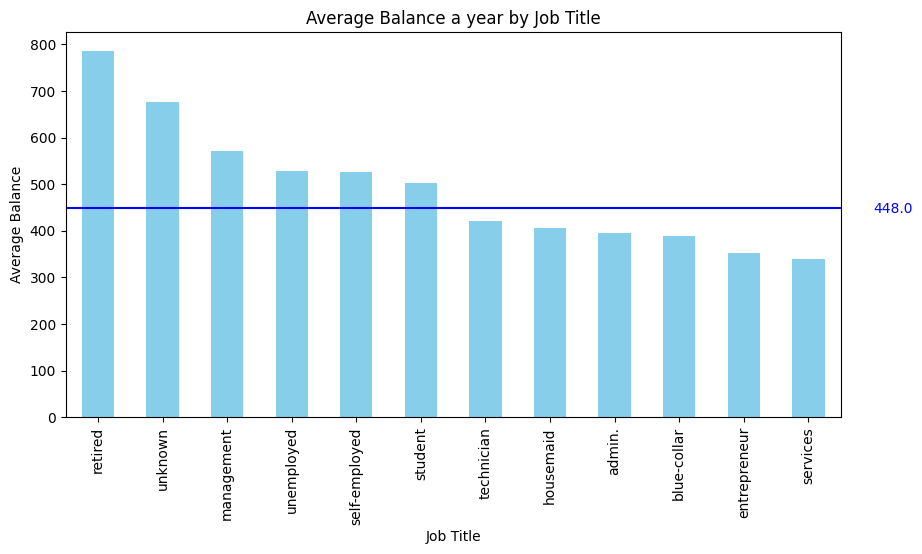

In [ ]:
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
job_median_balance = df.groupby('job').balance.median().sort_values(ascending = False)
bars = job_median_balance.plot.bar(color = 'skyblue')
plt.title('Average Balance a year by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Balance')

total_median_balance = df.balance.median()
plt.axhline(y=total_median_balance, color='blue', linestyle='-')
plt.text(len(job_median_balance), total_median_balance, f'{total_median_balance}', ha='left', va='center', color='blue')

plt.show()

In overall, all the jobs positions has available amount in their amount in their account. Furthermore, retired individuals, management professionals, unemployed individuals, self-employed individuals and those categorized as unknown tend to have higher account balances, indicating potentially subcribing the term deposit.

**In conclusion, our customer is stable, risk averse, have a big amount of loan and have significant amount of money do not use  => approriate for term deposit product. Therefore, term deposit marketing campaign is necessary to bank development.**

Additionally, they have not utilized the company's term deposit product.
Over 75% customers were not contacted in the last campaign; however, everyone has been reached at least once in this one.good credit, no personal loan (car, education), yes for housing

<Axes: xlabel='subscribed.deposit', ylabel='count'>

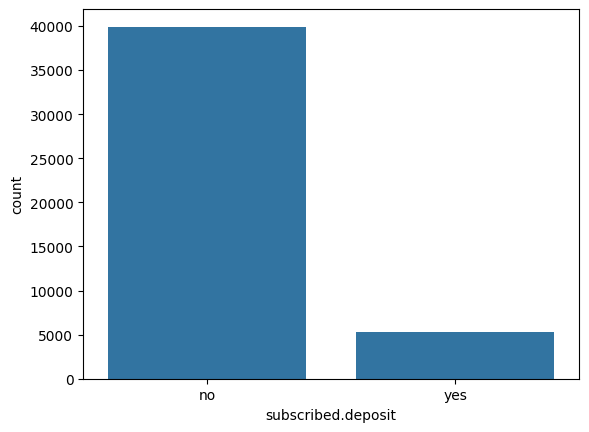

In [ ]:
sns.countplot(x = 'subscribed.deposit', data = df)

In [ ]:
#df with subscribed.deposit
cus_sub_deposit = df[df['subscribed.deposit'] == 'yes']
cus_sub_deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed.deposit
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


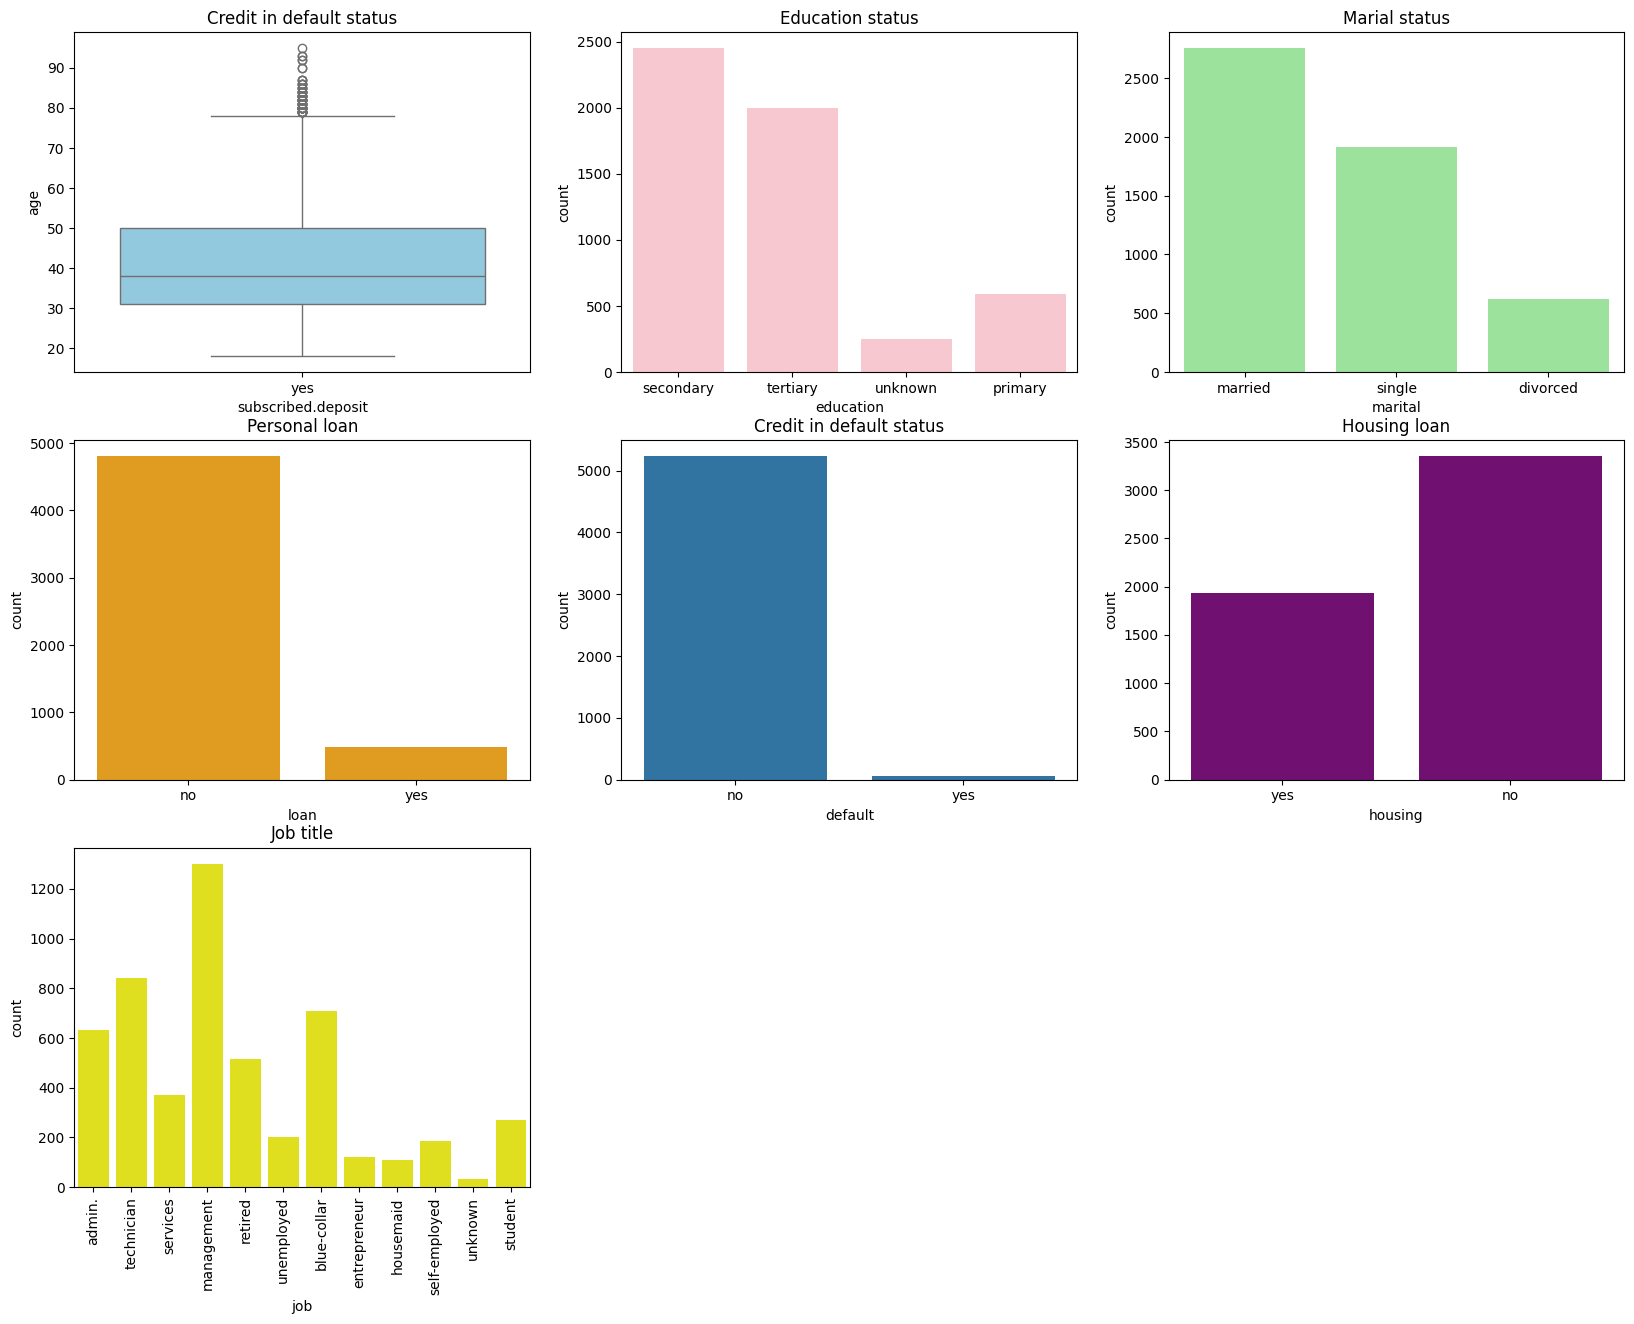

In [ ]:
plt.figure(figsize=(20, 15))
# age in deposit
plt.subplot(3,3,1)
sns.boxplot(x = 'subscribed.deposit', y = 'age', data = cus_sub_deposit, color = 'skyblue')
plt.title("Credit in default status")
#Education graph
plt.subplot(3,3,2)
sns.countplot(x = 'education', data = cus_sub_deposit, color = 'pink')
plt.title("Education status")
# Marital graph
plt.subplot(3,3,3)
sns.countplot(x = 'marital',data = cus_sub_deposit, color = 'lightgreen')
plt.title("Marial status")
# Personal loan graph
plt.subplot(3,3,4)
sns.countplot(x = 'loan', data = cus_sub_deposit, color = 'orange')
plt.title("Personal loan")
# default status in deposit
plt.subplot(3,3,5)
sns.countplot(x = 'default', data = cus_sub_deposit)
plt.title("Credit in default status")
# Housing loan graph
plt.subplot(3,3,6)
sns.countplot(x = 'housing', data = cus_sub_deposit, color = 'purple')
plt.title("Housing loan")
# Job graph
plt.subplot(3,3,7)
sns.countplot(x = 'job', data = cus_sub_deposit, color = 'yellow')
plt.title("Job title")
plt.xticks(rotation=90)
plt.show()

target audience: 30-50, secondary and tertiary, married, single, no personal loan housing, good credit,

In [ ]:
cus_contacted = df[df['previous'] > 0]
cus_contacted.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed.deposit
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


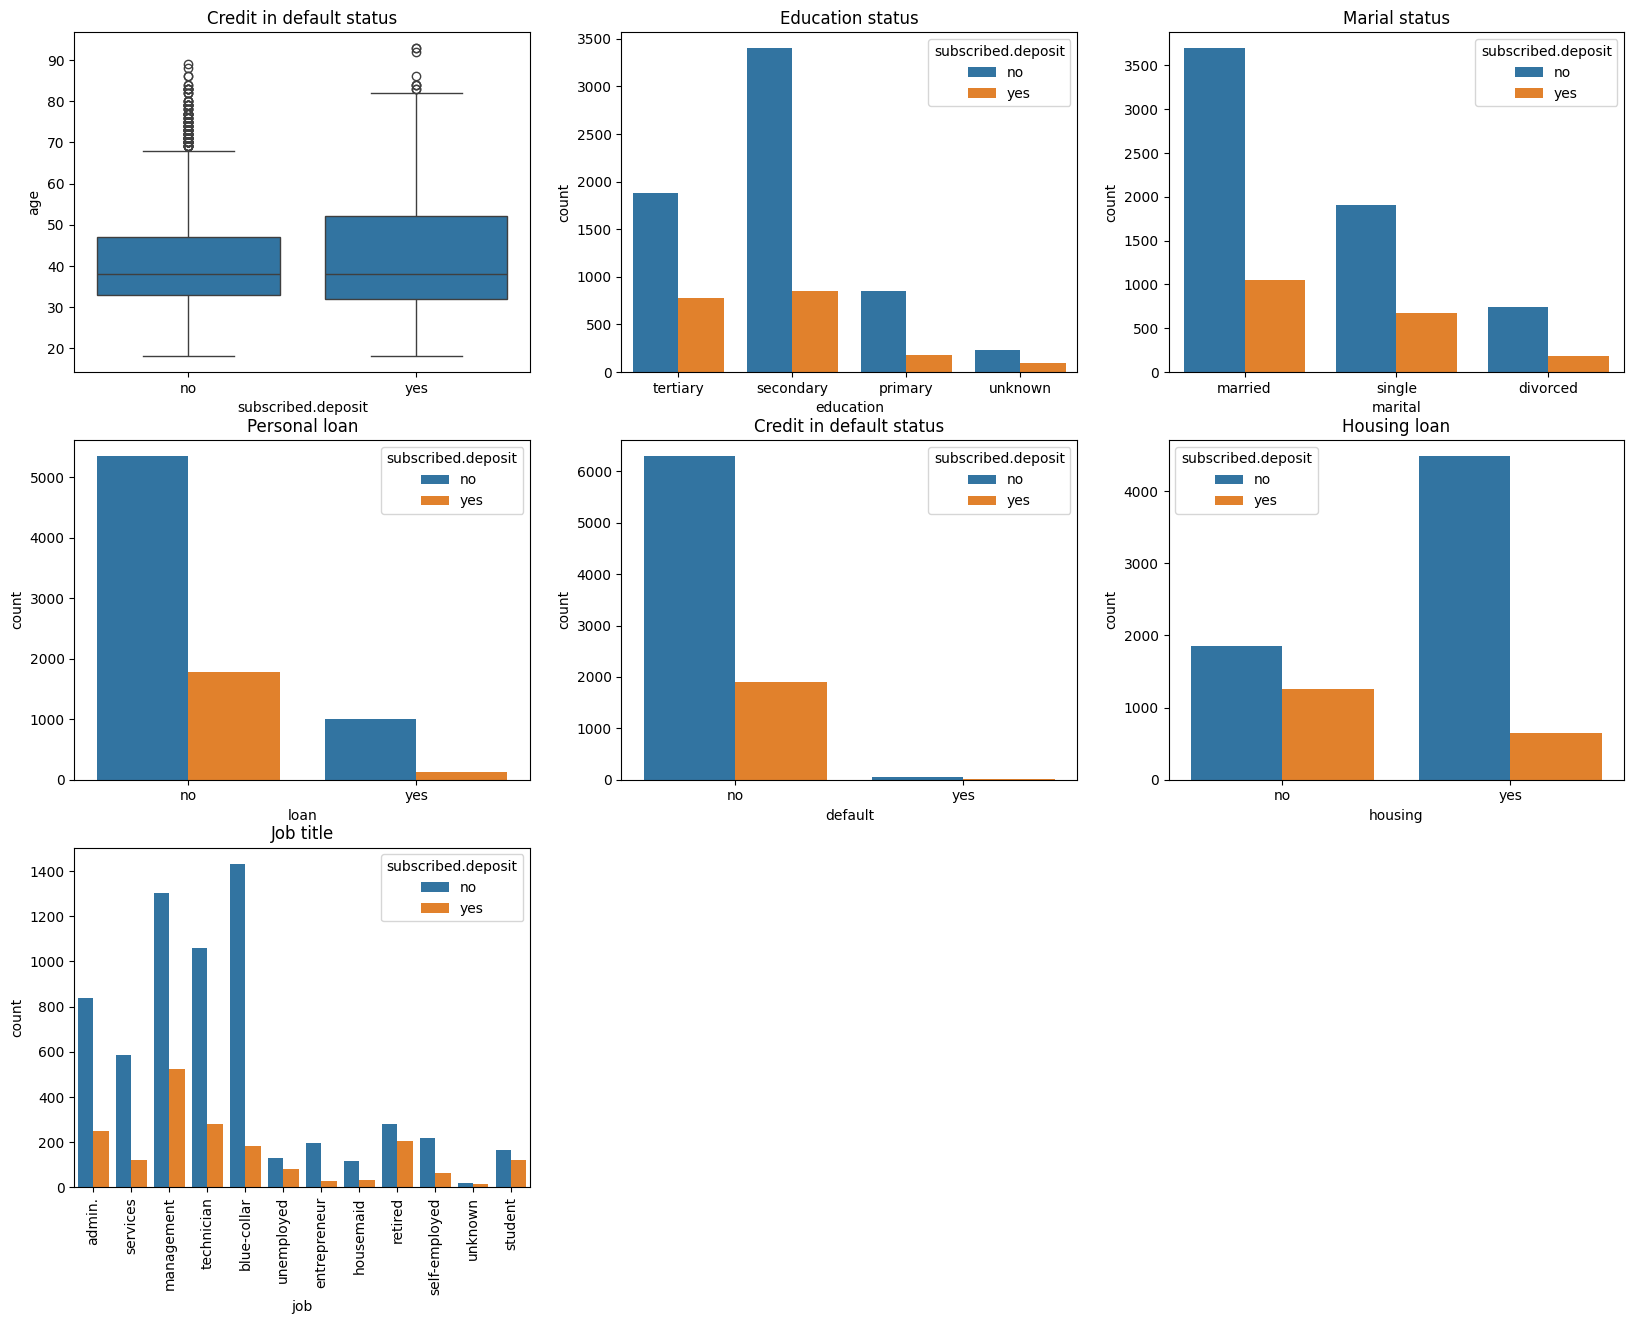

In [ ]:
plt.figure(figsize=(20, 15))
# age in deposit
plt.subplot(3,3,1)
sns.boxplot(x = 'subscribed.deposit', y = 'age', data = cus_contacted)
plt.title("Credit in default status")
#Education graph
plt.subplot(3,3,2)
sns.countplot(x = 'education', hue = "subscribed.deposit", data = cus_contacted)
plt.title("Education status")
# Marital graph
plt.subplot(3,3,3)
sns.countplot(x = 'marital', hue = "subscribed.deposit", data = cus_contacted)
plt.title("Marial status")
# Personal loan graph
plt.subplot(3,3,4)
sns.countplot(x = 'loan', hue = "subscribed.deposit", data = cus_contacted)
plt.title("Personal loan")
# default status in deposit
plt.subplot(3,3,5)
sns.countplot(x = 'default', hue = "subscribed.deposit", data = cus_contacted)
plt.title("Credit in default status")
# Housing loan graph
plt.subplot(3,3,6)
sns.countplot(x = 'housing', hue = "subscribed.deposit", data = cus_contacted)
plt.title("Housing loan")
# Job graph
plt.subplot(3,3,7)
sns.countplot(x = 'job', hue = "subscribed.deposit", data = cus_contacted)
plt.title("Job title")
plt.xticks(rotation=90)
plt.show()